In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/Titanic Data Set CSV File (main).csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'].isnull().sum()

177

<ipython-input-6-0734abde56f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

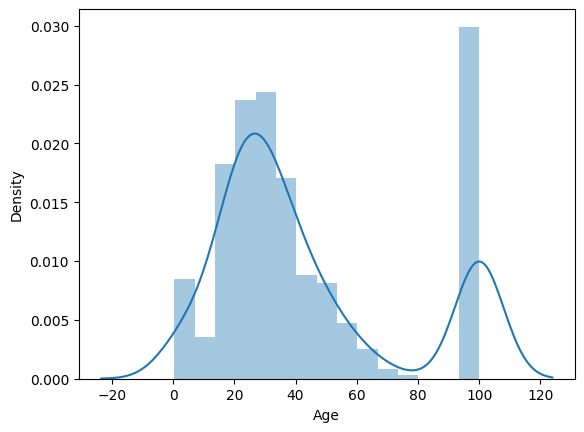

In [ ]:
import seaborn as sns
sns.distplot(data['Age'].fillna(100))

In [ ]:
#Whenever we have normal distribution we use extreme value analysis to estimate outliers

Text(0, 0.5, 'PAssengers')

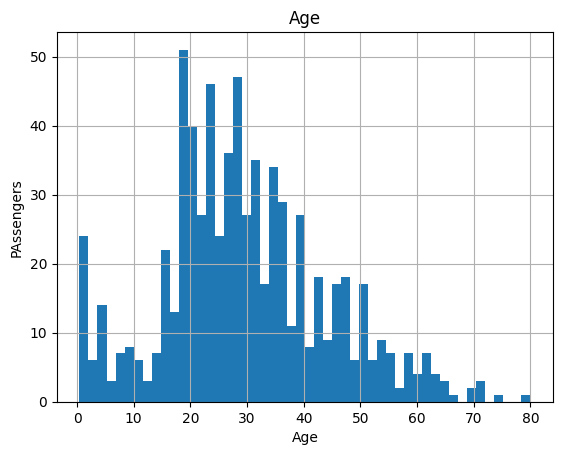

In [ ]:
fig=data.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("PAssengers")

In [ ]:
#GAUSSIAN DISTRIBUTION

#WHENEVER WE HAVE GAUSSIAN DISTRIBUTION WE USE "THREE STANDARD DEVIATION"

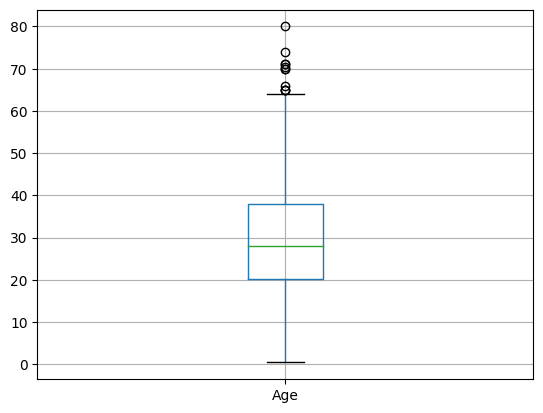

In [ ]:
fig=data.boxplot(column="Age")

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Assuming Age follows a gaussian distribution we will calculate the boundaries which differentiate the outliers

In [ ]:
upper_boundary=data['Age'].mean()+3*data['Age'].std()
lower_boundary=data['Age'].mean()-3*data['Age'].std()
print(lower_boundary,upper_boundary,data['Age'].mean())

-13.880374349943303 73.27860964406094 29.69911764705882


In [ ]:
#Computing the Inter Quantile range to calculate the boundaries
iqr=data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
iqr

17.875

In [ ]:
#(use this in skewed data set and not gaussian distribution)
#lower_bridge=data['Age'].quantile(0.25)-(iqr*1.5)
#upper_bridge=data['Age'].quantile(0.75)+(iqr*1.5)
#print(lower_bridge,upper_bridge)

#After 64 everything is outlier

-6.6875 64.8125


In [ ]:
#Extreme Outliers (use this in skewed data set)
#lower_bridge=data['Age'].quantile(0.25)-(iqr*3)
#upper_bridge=data['Age'].quantile(0.75)+(iqr*3)
#print(lower_bridge,upper_bridge)

#After 92 everything is outlier

-33.5 91.625


In [ ]:
#Feature is skewed

Text(0, 0.5, 'PAssengers')

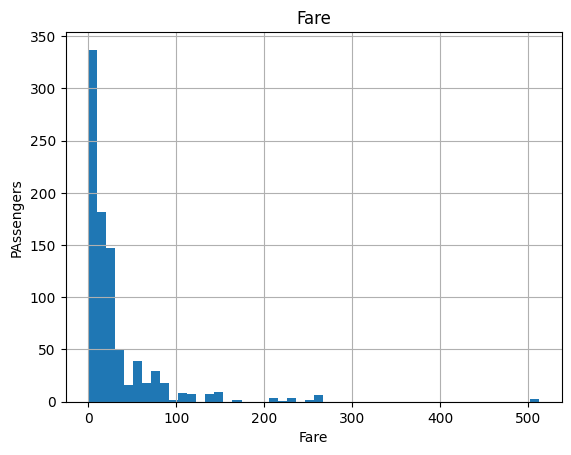

In [ ]:
fig=data.Fare.hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("PAssengers")

In [ ]:
#this dataset is skewed (right skewed)

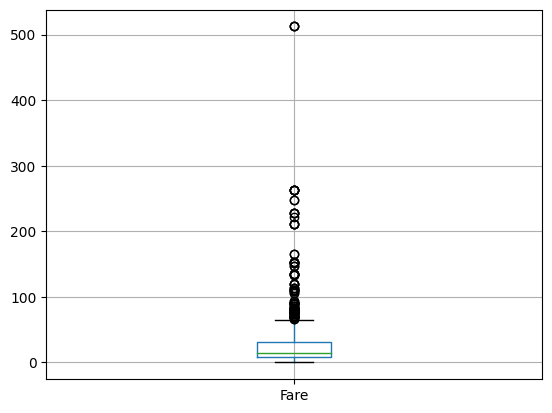

In [ ]:
fig=data.boxplot(column="Fare")

In [ ]:
#This shows there are huge amount of outliers

In [ ]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
#Since there are large number of difference between max and 75% that means we ahve these many outliers

In [ ]:
# Calculating the IQR
iqr=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
iqr

23.0896

In [ ]:
lower_bridge=data['Fare'].quantile(0.25)-(iqr*1.5)
upper_bridge=data['Fare'].quantile(0.75)+(iqr*1.5)
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [ ]:
#Extreme Outliers
lower_bridge=data['Fare'].quantile(0.25)-(iqr*3)
upper_bridge=data['Fare'].quantile(0.75)+(iqr*3)
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [ ]:
#minus value is not considered since fare can nit be negative

In [ ]:
final_data=data.copy()

In [ ]:
#wherever the data of age is greater than 73 that is outlier replce it with 73
final_data.loc[final_data['Age']>73,'Age']=73

In [ ]:
final_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
final_data.loc[final_data['Fare']>100,'Fare']=100

Text(0, 0.5, 'PAssengers')

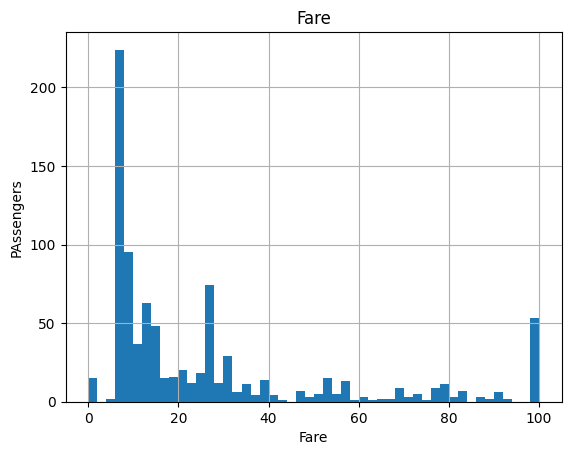

In [ ]:
c

Text(0, 0.5, 'PAssengers')

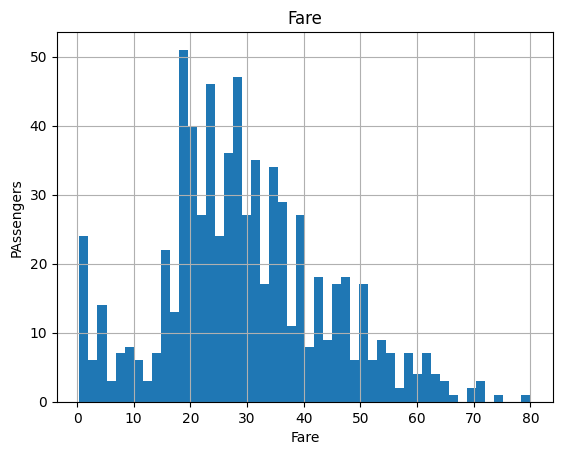

In [ ]:
fig=data.Age.hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("PAssengers")